In [29]:
import pickle as pkl
import pandas as pd

import numpy as np

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity


In [32]:
with open('all_lyrics_df.pkl', 'rb') as f:
    all_lyrics_df = pkl.load(f)

with open('taxis_df.pkl', 'rb') as f:
    taxis_df = pkl.load(f)

with open('prosody_df.pkl', 'rb') as f:
    prosody_df = pkl.load(f)

In [33]:
with open('tfidf_v1.pkl', 'rb') as f: 
    X_tfidf = pkl.load(f)

In [34]:

X = all_lyrics_df.lyrics
y = all_lyrics_df.song

In [5]:
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

In [6]:
# LSA
lsa = TruncatedSVD(3)
song_topic = lsa.fit_transform(X_tfidf)


In [7]:
lsa.components_

array([[ 3.13268289e-04,  2.92496530e-04,  3.74620438e-05, ...,
         1.52458754e-05,  1.72233910e-05,  6.86466341e-05],
       [-2.29357954e-04, -4.96095020e-04, -1.80382420e-05, ...,
        -3.26364398e-05, -5.29796716e-05,  7.38895047e-05],
       [-5.85078767e-04,  7.75026130e-04, -4.82829699e-05, ...,
        -3.55822884e-05, -2.72232314e-05, -1.18669622e-04]])

In [8]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["component_{}".format(i) for i in range(1,4)],
             columns = vectorizer.get_feature_names())
topic_word

aa    aaa  aaaa  aaaaa  aaaaaa  aaaaaaaaaaaah  \
component_1  0.000  0.000   0.0    0.0     0.0            0.0   
component_2 -0.000 -0.000  -0.0   -0.0    -0.0           -0.0   
component_3 -0.001  0.001  -0.0   -0.0    -0.0           -0.0   

             aaaaaaaaaaaassssssss  aaaaaaaalchemist  aaaaaah  aaaaaaminé  ...  \
component_1                   0.0               0.0      0.0         0.0  ...   
component_2                  -0.0               0.0     -0.0        -0.0  ...   
component_3                  -0.0              -0.0     -0.0         0.0  ...   

             ﬁghter  ﬁghtin  ﬁgure  ﬁnd  ﬁnger  ﬁshers   ﬁt  ﬁtted  ﬂirts   𝘐𝘵  
component_1     0.0     0.0    0.0  0.0    0.0     0.0  0.0    0.0    0.0  0.0  
component_2    -0.0    -0.0   -0.0 -0.0   -0.0    -0.0 -0.0   -0.0   -0.0  0.0  
component_3    -0.0    -0.0   -0.0 -0.0   -0.0    -0.0 -0.0   -0.0   -0.0 -0.0  

[3 rows x 85114 columns]

In [9]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [10]:
display_topics(lsa, vectorizer.get_feature_names(), 50)


Topic  0
im, like, yeah, nigga, dont, got, know, aint, niggas, bitch, shit, just, fuck, cause, love, baby, want, wanna, man, thats, make, em, time, money, say, let, need, oh, right, girl, tell, way, ya, gon, come, life, real, gotta, feel, yo, youre, ill, think, bitches, ass, really, hit, yall, said, bout

Topic  1
nigga, bitch, niggas, fuck, shit, bitches, money, ass, lil, aint, hoes, ayy, gang, pussy, fuckin, dick, got, em, ho, yall, big, gon, yo, bout, motherfuckin, hit, talkin, pull, fucking, young, block, shoot, glock, rich, gangsta, wit, bag, bang, real, trap, bands, huh, hoe, broke, motherfucker, cash, pop, hood, dope, gettin

Topic  2
yeah, ayy, ooh, oh, baby, bitch, uh, woo, woah, girl, huh, shawty, lil, hey, gon, love, skrrt, want, ima, diamonds, racks, ah, okay, gang, bands, yuh, bad, whoa, bag, nah, tryna, pull, ho, wrist, bitches, uhhuh, drip, pussy, wanna, need, coupe, babe, slatt, trap, know, flex, dick, alright, yah, aw


In [11]:
nmf = NMF(4)
doc_topic = nmf.fit_transform(X_tfidf)

In [12]:
topic_word = pd.DataFrame(nmf.components_.round(3),
             index = ["component_{}".format(i) for i in range(1,5)],
             columns = vectorizer.get_feature_names())
topic_word

aa    aaa  aaaa  aaaaa  aaaaaa  aaaaaaaaaaaah  \
component_1  0.003  0.000   0.0    0.0   0.001          0.001   
component_2  0.000  0.000   0.0    0.0   0.000          0.000   
component_3  0.000  0.002   0.0    0.0   0.000          0.000   
component_4  0.000  0.003   0.0    0.0   0.000          0.001   

             aaaaaaaaaaaassssssss  aaaaaaaalchemist  aaaaaah  aaaaaaminé  ...  \
component_1                   0.0               0.0      0.0         0.0  ...   
component_2                   0.0               0.0      0.0         0.0  ...   
component_3                   0.0               0.0      0.0         0.0  ...   
component_4                   0.0               0.0      0.0         0.0  ...   

             ﬁghter  ﬁghtin  ﬁgure  ﬁnd  ﬁnger  ﬁshers   ﬁt  ﬁtted  ﬂirts   𝘐𝘵  
component_1     0.0     0.0    0.0  0.0    0.0     0.0  0.0    0.0    0.0  0.0  
component_2     0.0     0.0    0.0  0.0    0.0     0.0  0.0    0.0    0.0  0.0  
component_3     0.0     0.0    0.0  0.0    0.0     0.0  0.0    0.0    0.0  0.0  
component_4     0.0     0.0    0.0  0.0    0.0     0.0  0.0    0.0    0.0  0.0  

[4 rows x 85114 columns]

In [13]:
display_topics(nmf, vectorizer.get_feature_names(), 50)



Topic  0
im, like, dont, just, got, know, aint, cause, man, life, time, thats, make, em, say, shit, way, right, ill, think, ya, feel, yo, people, gonna, gotta, youre, let, tell, day, need, better, said, wanna, mind, yall, ive, come, look, world, black, good, really, little, hard, new, live, trying, real, god

Topic  1
nigga, niggas, bitch, fuck, shit, aint, got, bitches, money, like, ass, im, gon, hoes, em, dont, lil, pussy, real, fuckin, bout, know, hit, gang, thats, yo, dick, big, yall, ho, fucking, young, want, ya, boy, ain, man, don, pull, talkin, bad, wit, wanna, run, cause, broke, gotta, ima, block, make

Topic  2
yeah, ayy, uh, ooh, im, bitch, oh, got, woo, like, huh, woah, know, hey, ima, okay, gon, tryna, shawty, ah, diamonds, lil, skrrt, racks, aint, nah, bad, dont, pull, just, big, bag, need, yuh, fuck, whoa, gang, money, bands, wanna, uhhuh, party, new, look, wrist, way, ho, gettin, drip, thats

Topic  3
love, baby, girl, oh, know, want, dont, wanna, just, youre, let, need

#### Notes: 
Topic 0: Significantly fewer interjections ('ayy', 'ooh', etc.) and the clearest diversity of vocabulary. Terms appear comparatively more abstract. Likely capturing more lyrically dense songs relative to other categories. 

Topic 1: The most dominated by profanity and bragadocious terms ('b*tches', 'd*ck', 'pull', 'money') as well as an outsized amount of first/second person pronouns  ('im', 'em', 'yall', 'ya', 'ima') implying combative or comparative content. 

Topic 2: Dominated by interjections and materialistic nouns ('diamonds', 'racks', 'bag', 'money', 'bands', 'wrist', 'drip'). Likely to be catchier, less lyrically dense songs (i.e. 'club bangers').

Topic 3: Very clearly oriented around love and sex ('love', 'baby', 'girl' are the top 3 words), focusing on emotional terms ('wanna', 'feel', 'mind') and intimacy ('night', 'heart', 'hold', 'body', 'babe', 'eyes').  

In [14]:
H = pd.DataFrame(doc_topic.round(5),
             index = y,
             columns = ['Lyrical/Misc', 'Bragging/Combative', 'Money/Party', 'Romance/Sex'])
H = H.reset_index()
H 

song  Lyrical/Misc  Bragging/Combative  Money/Party  \
0      /songs/3546392       0.01363             0.01723      0.00556   
1      /songs/3801456       0.01710             0.02290      0.00417   
2      /songs/3545295       0.00576             0.02158      0.02876   
3      /songs/4485607       0.01700             0.03912      0.00314   
4      /songs/3801450       0.00948             0.06000      0.01103   
...               ...           ...                 ...          ...   
17561   /songs/347240       0.03320             0.00000      0.00938   
17562    /songs/48980       0.04583             0.00000      0.00000   
17563    /songs/48968       0.03609             0.00000      0.00000   
17564    /songs/48960       0.03703             0.00000      0.00030   
17565    /songs/48951       0.03457             0.00000      0.00000   

       Romance/Sex  
0          0.02202  
1          0.00493  
2          0.00000  
3          0.00820  
4          0.03082  
...            ...  
17561      0.00697  
17562      0.01404  
17563      0.00568  
17564      0.00000  
17565      0.00118  

[17566 rows x 5 columns]

In [15]:
artist_mean_topic = all_lyrics_df[['artist', 'song']].merge(H).groupby('artist').mean()

#### Notable Artists 

*Lyrical/Misc*:
Eminem, Black Thought, Grandmaster Flash, Ab-Soul, Fort Minor, Logic

*Bragging/Combative*: 
Meek Mill, Jadakiss, Pusha T, Bobby Shmurda, Soulja Boy, Too Short

*Money/Party*:
Young Thug, Lil Uzi Vert, Nicki Minaj, Lil Pump, Playboi Carti, DaBaby 

*Romance/Sex*:The Weeknd, Usher, Chris Brown, R. Kelly, Trey Songz



In [16]:
artist_mean_topic.sort_values('Romance/Sex', ascending=False).head(51)

Lyrical/Misc  Bragging/Combative  Money/Party  Romance/Sex
artist                                                                        
The-Dream               0.010200            0.019890     0.023680     0.081300
Taio Cruz               0.015455            0.000000     0.000960     0.073485
Mo B. Dick              0.025330            0.000000     0.010100     0.070920
Jennifer Lopez          0.023398            0.002757     0.019650     0.070156
Johntá Austin           0.013590            0.000000     0.000000     0.067080
J. Valentine            0.024882            0.004070     0.019495     0.065770
Aloe Blacc              0.000725            0.000000     0.063280     0.065115
Benny Blanco            0.022720            0.000000     0.024930     0.064930
Curtiss King            0.016532            0.011083     0.000013     0.064118
Focus...                0.006962            0.005955     0.042385     0.062872
The Weeknd              0.009018            0.006061     0.023968     0.062617
A+                      0.009018            0.006061     0.023968     0.062617
Tablo                   0.009450            0.000310     0.017600     0.060220
Usher                   0.018077            0.001141     0.015112     0.059356
Sleepy Brown            0.003253            0.000837     0.009030     0.057590
Stitches                0.027250            0.000000     0.000000     0.057550
DJ Premier              0.021917            0.000276     0.014152     0.053385
BJ the Chicago Kid      0.010823            0.004880     0.007557     0.052480
Anthony Parker          0.029152            0.003753     0.020653     0.052345
Deuce                   0.012928            0.011560     0.036680     0.051697
Chris Brown             0.012928            0.011560     0.036680     0.051697
Murs                    0.018438            0.000141     0.012051     0.050800
Verse Simmonds          0.015731            0.008958     0.011669     0.050392
Mariah Carey            0.019009            0.001441     0.009131     0.050163
David Rush              0.021495            0.004185     0.000000     0.049855
REASON                  0.023432            0.000000     0.008022     0.049808
MC Trouble              0.034795            0.000000     0.004380     0.049660
Fergie                  0.019925            0.001665     0.015983     0.049548
Omarion                 0.014382            0.010553     0.018504     0.049176
Knero                   0.036030            0.000000     0.000000     0.049150
R. Kelly                0.015658            0.002227     0.010027     0.049043
PARTYNEXTDOOR           0.010384            0.012717     0.023561     0.048723
Butch Cassidy           0.014815            0.001035     0.004240     0.048570
Young Noble             0.038920            0.008905     0.000000     0.048300
Doug E. Fresh           0.028825            0.000000     0.000740     0.048185
Bas                     0.011681            0.000501     0.001550     0.047941
Fatboi                  0.016230            0.014717     0.040026     0.047898
Trey Songz              0.016997            0.009022     0.014713     0.047683
Lauryn Hill             0.015279            0.001192     0.002023     0.046217
T.I.                    0.023385            0.035491     0.025090     0.044844
Bryson Tiller           0.023385            0.035491     0.025090     0.044844
Olivia                  0.017342            0.000154     0.005664     0.044740
Treach                  0.019180            0.000000     0.058600     0.044710
Maejor Ali              0.020140            0.003498     0.007314     0.043946
IceJJFish               0.020921            0.017308     0.010906     0.043943
Wizkid                  0.017140            0.000000     0.007210     0.043800
Val Young               0.007717            0.000666     0.000873     0.043714
Baeza                   0.030285            0.015080     0.001460     0.042980
Bobby Brackins          0.009620            0.012053     0.009029     

In [25]:
artist_mean_taxis = taxis_df.groupby('artist').mean()
artist_mean_taxis

lines        words  words_per_line  unique_words  \
artist                                                             
03 Greedo   76.312500  2684.312500       35.125816    185.375000   
070 Shake   70.352941  2122.294118       30.507007    137.470588   
2 Chainz    68.333333  2240.666667       32.916186    194.111111   
2 Pistols   78.545455  2203.181818       28.376804    178.272727   
21 Savage   81.904762  2764.666667       33.424155    189.095238   
...               ...          ...             ...           ...   
Zebra Katz  67.666667  1737.833333       25.122420    132.944444   
Zelooperz   57.636364  1636.636364       29.884914    151.060606   
Zion I      60.300000  2030.800000       34.300381    210.200000   
bbno$       53.000000  1655.666667       31.152735     92.333333   
will.i.am   77.200000  2503.800000       33.323155    163.733333   

            unique_word_rate  
artist                        
03 Greedo           0.070810  
070 Shake           0.071274  
2 Chainz            0.090778  
2 Pistols           0.085574  
21 Savage           0.070440  
...                      ...  
Zebra Katz          0.087163  
Zelooperz           0.095839  
Zion I              0.104322  
bbno$               0.055000  
will.i.am           0.067369  

[1260 rows x 5 columns]

In [26]:
artist_mean_prosody = prosody_df.groupby('artist').mean()
artist_mean_prosody

syllables  syllables_per_line  syllables_per_word
artist                                                        
03 Greedo   701.687500            9.211347            0.261876
070 Shake   561.941176            8.091570            0.264949
2 Chainz    590.000000            8.641371            0.262462
2 Pistols   562.272727            7.243027            0.255224
21 Savage   706.047619            8.484020            0.253769
...                ...                 ...                 ...
Zebra Katz  451.888889            6.521429            0.259716
Zelooperz   422.696970            7.746176            0.258715
Zion I      532.600000            8.986945            0.262015
bbno$       456.000000            8.575163            0.275106
will.i.am   652.666667            8.664136            0.259974

[1260 rows x 3 columns]

In [23]:
artist_mean_topic

Lyrical/Misc  Bragging/Combative  Money/Party  Romance/Sex
artist                                                                
03 Greedo       0.012388            0.040464     0.021360     0.011842
070 Shake       0.015179            0.001804     0.021861     0.036665
2 Chainz        0.018329            0.023071     0.021967     0.006407
2 Pistols       0.013755            0.030431     0.018532     0.021855
21 Savage       0.007464            0.046448     0.046098     0.008801
...                  ...                 ...          ...          ...
Zebra Katz      0.025077            0.012421     0.018921     0.016527
Zelooperz       0.018682            0.037817     0.003213     0.006282
Zion I          0.031290            0.000425     0.003131     0.006091
bbno$           0.009183            0.010923     0.004047     0.009563
will.i.am       0.004096            0.019755     0.047252     0.040928

[1260 rows x 4 columns]

In [29]:
artist_features = artist_mean_topic.join(artist_mean_taxis, how='inner').join(artist_mean_prosody, how='inner')
artist_features

Lyrical/Misc  Bragging/Combative  Money/Party  Romance/Sex  \
artist                                                                   
03 Greedo       0.012388            0.040464     0.021360     0.011842   
070 Shake       0.015179            0.001804     0.021861     0.036665   
2 Chainz        0.018329            0.023071     0.021967     0.006407   
2 Pistols       0.013755            0.030431     0.018532     0.021855   
21 Savage       0.007464            0.046448     0.046098     0.008801   
...                  ...                 ...          ...          ...   
Zebra Katz      0.025077            0.012421     0.018921     0.016527   
Zelooperz       0.018682            0.037817     0.003213     0.006282   
Zion I          0.031290            0.000425     0.003131     0.006091   
bbno$           0.009183            0.010923     0.004047     0.009563   
will.i.am       0.004096            0.019755     0.047252     0.040928   

                lines        words  words_per_line  unique_words  \
artist                                                             
03 Greedo   76.312500  2684.312500       35.125816    185.375000   
070 Shake   70.352941  2122.294118       30.507007    137.470588   
2 Chainz    68.333333  2240.666667       32.916186    194.111111   
2 Pistols   78.545455  2203.181818       28.376804    178.272727   
21 Savage   81.904762  2764.666667       33.424155    189.095238   
...               ...          ...             ...           ...   
Zebra Katz  67.666667  1737.833333       25.122420    132.944444   
Zelooperz   57.636364  1636.636364       29.884914    151.060606   
Zion I      60.300000  2030.800000       34.300381    210.200000   
bbno$       53.000000  1655.666667       31.152735     92.333333   
will.i.am   77.200000  2503.800000       33.323155    163.733333   

            unique_word_rate   syllables  syllables_per_line  \
artist                                                         
03 Greedo           0.070810  701.687500            9.211347   
070 Shake           0.071274  561.941176            8.091570   
2 Chainz            0.090778  590.000000            8.641371   
2 Pistols           0.085574  562.272727            7.243027   
21 Savage           0.070440  706.047619            8.484020   
...                      ...         ...                 ...   
Zebra Katz          0.087163  451.888889            6.521429   
Zelooperz           0.095839  422.696970            7.746176   
Zion I              0.104322  532.600000            8.986945   
bbno$               0.055000  456.000000            8.575163   
will.i.am           0.067369  652.666667            8.664136   

            syllables_per_word  
artist                          
03 Greedo             0.261876  
070 Shake             0.264949  
2 Chainz              0.262462  
2 Pistols             0.255224  
21 Savage             0.253769  
...                        ...  
Zebra Katz            0.259716  
Zelooperz             0.258715  
Zion I                0.262015  
bbno$                 0.275106  
will.i.am             0.259974  

[1260 rows x 12 columns]

In [30]:
with open('artist_features.pkl', 'wb') as f:
    pkl.dump(artist_features, f)

In [2]:
import nltk 
import gensim

In [26]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors

glove_file = datapath('glove.6B/glove.6B.300d.txt')
tmp_file = get_tmpfile("glove_word2vec.txt")

from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_file, tmp_file)

model = KeyedVectors.load_word2vec_format(tmp_file)

In [28]:
model.similar_by_word('nrigge')

[('slur', 0.5023007988929749),
 ('niggers', 0.5003143548965454),
 ('faggot', 0.4708784222602844),
 ('bitch', 0.4464226961135864),
 ('epithet', 0.4176267981529236),
 ('fag', 0.39248010516166687),
 ('derogatory', 0.3918154239654541),
 ('fucking', 0.3879571557044983),
 ('word', 0.38172590732574463),
 ('epithets', 0.37776145339012146)]

In [60]:
# mean word vector for each word in 
def doc_vec(doc):
    return np.mean([model[word] for word in doc if word in model.vocab], axis=0)


In [52]:
xvec = X.apply(lambda x: x.replace('\n', ' '))
xvec = xvec.apply(lambda x: x.replace('     ', '    '))
xvec = xvec.apply(lambda x: x.replace('    ', '   '))
xvec = xvec.apply(lambda x: x.replace('   ', '  ')) 
xvec = xvec.apply(lambda x: x.replace('  ', ' '))

In [53]:
xvec[0]

0     three purple hearts three purple hearts three...
0     hey today made today super done fill it up sa...
0     yeah uum no matter what they say i smoke join...
0     woho all i know is fast money and homicide i ...
0      slaughter gang gang yall know what the fuck ...
                           ...                        
0     yea yea yea yea yea krs coming through big za...
0     he keep a turban on parasangs parasangs tall ...
0     yeah yeah im havin the time of my life man it...
0     these bitches killing me you already know tha...
0     sitting in the oven is hot and people buggin ...
Name: lyrics, Length: 1255, dtype: object

In [62]:
gloved_x = xvec.apply(lambda x: doc_vec(x) )

In [65]:
gloved_x

0    [-0.25415248, 0.036394212, -0.28789043, -0.074...
1    [-0.282765, 0.07140126, -0.30133986, -0.061436...
2    [-0.22827968, 0.061360754, -0.24592069, -0.095...
3    [-0.22400367, 0.042859178, -0.2785351, -0.0546...
4    [-0.23846172, 0.06544926, -0.29019353, -0.0666...
                           ...                        
5    [-0.27168494, 0.08572524, -0.3226468, -0.07192...
6    [-0.23236783, 0.054174546, -0.28898424, -0.077...
7    [-0.25299704, 0.06477398, -0.28564256, -0.0633...
8    [-0.25301054, 0.044994242, -0.2818428, -0.0651...
9    [-0.27173, 0.0725903, -0.2942238, -0.07039422,...
Name: lyrics, Length: 17566, dtype: object

In [68]:
from sklearn.manifold import TSNE

In [115]:
tsne = TSNE(n_components=2, verbose=1, perplexity=200, n_iter=300)
tsne_results = tsne.fit_transform(np.vstack(gloved_x.to_numpy()))

x = tsne_results[:,0]
y = tsne_results[:,1]

[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 17566 samples in 0.360s...
[t-SNE] Computed neighbors for 17566 samples in 174.517s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17566
[t-SNE] Computed conditional probabilities for sample 2000 / 17566
[t-SNE] Computed conditional probabilities for sample 3000 / 17566
[t-SNE] Computed conditional probabilities for sample 4000 / 17566
[t-SNE] Computed conditional probabilities for sample 5000 / 17566
[t-SNE] Computed conditional probabilities for sample 6000 / 17566
[t-SNE] Computed conditional probabilities for sample 7000 / 17566
[t-SNE] Computed conditional probabilities for sample 8000 / 17566
[t-SNE] Computed conditional probabilities for sample 9000 / 17566
[t-SNE] Computed conditional probabilities for sample 10000 / 17566
[t-SNE] Computed conditional probabilities for sample 11000 / 17566
[t-SNE] Computed conditional probabilities for sample 12000 / 17566
[t-SNE] Computed conditional probabilities for 

In [141]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 4, init='random', n_init=10, max_iter=300, random_state=77)
y_km = km.fit_predict(glovestack)

In [142]:
glove_tsne = pd.DataFrame({'x':x, 'y':y, 'cluster':y_km})

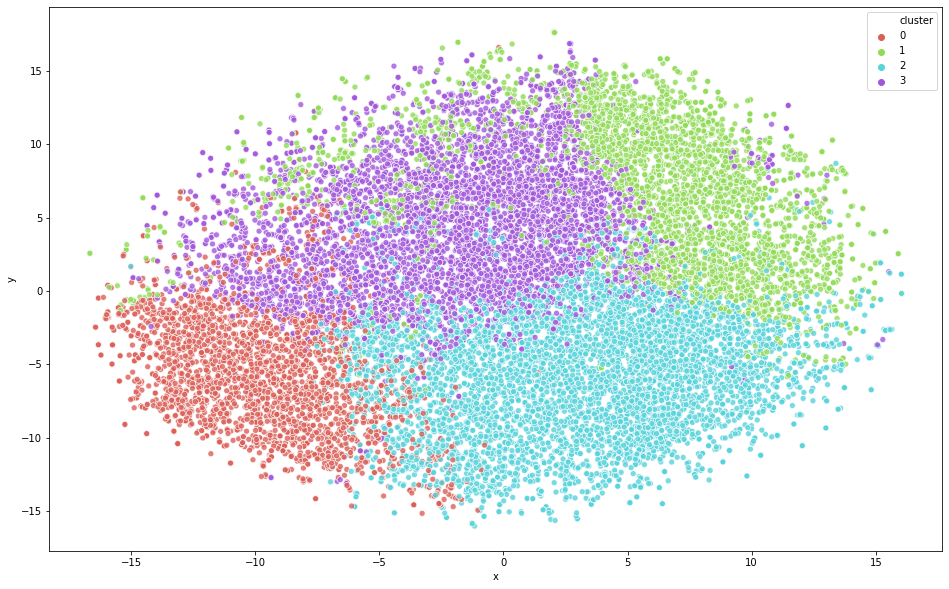

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.scatterplot(x='x', y='y',hue='cluster', data=glove_tsne, palette=sns.color_palette("hls", 4), alpha=0.8)

In [132]:
class Cluster():

    def __init__(self, data, scaler, n_clusters, n_init, cluster):
        self.data = data.copy()
        self.scaler = scaler()
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.cluster = cluster(n_clusters=self.n_clusters, random_state=77, n_init=self.n_init)
        self.cluster_counts_ = None
        self.centroids_ = None
        self.inertia_ = None

    def scale(self):
        self.data = pd.DataFrame(self.scaler.fit_transform(self.data), columns=self.data.columns, index=self.data.index)

    def fit(self):
        self.cluster.fit(self.data)
        self.data['cluster'] = self.cluster.labels_
        self.cluster_counts_ = self.data.groupby('cluster').count().iloc[:,0]
        self.centroids_ = self.cluster.cluster_centers_
        self.inertia_ = self.cluster.inertia_

In [139]:
def kmeans_scree_plot(data, scaler, min_k, max_k, n_iter):
    cluster = Cluster(data, scaler, min_k, n_iter, KMeans)
    n_clusters = [i for i in range(min_k,max_k+1)]    
    inertias = []
    # cluster.scale()
    data = cluster.data
    for k in n_clusters:
        cluster = Cluster(data, scaler, k, n_iter, KMeans)
        cluster.fit()
        inertias.append(cluster.inertia_)
    plt.plot(n_clusters, inertias)
    print(list(zip(n_clusters, inertias)))

In [135]:
glove_df = pd.DataFrame(glovestack)

[(3, 1495.352783203125), (4, 1438.90966796875), (5, 1395.16748046875), (6, 1358.719482421875), (7, 1329.0140380859375), (8, 1304.4202880859375), (9, 1283.2000732421875), (10, 1263.81787109375)]


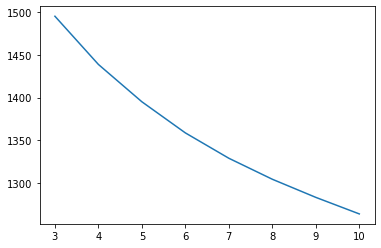

In [140]:
from sklearn.preprocessing import StandardScaler
kmeans_scree_plot(glove_df, StandardScaler, 3, 10, 300)

In [145]:
glove_df['cluster'] = y_km

In [146]:
glove_df

0         1         2         3         4         5         6  \
0     -0.254152  0.036394 -0.287890 -0.074316 -0.617722 -0.045850 -0.073386   
1     -0.282765  0.071401 -0.301340 -0.061437 -0.610961 -0.016582 -0.050560   
2     -0.228280  0.061361 -0.245921 -0.095139 -0.591871  0.004248 -0.038241   
3     -0.224004  0.042859 -0.278535 -0.054612 -0.624860 -0.008419 -0.046419   
4     -0.238462  0.065449 -0.290194 -0.066648 -0.607357  0.011492 -0.058800   
...         ...       ...       ...       ...       ...       ...       ...   
17561 -0.271685  0.085725 -0.322647 -0.071924 -0.610330 -0.049904 -0.066384   
17562 -0.232368  0.054175 -0.288984 -0.077635 -0.606025 -0.011900 -0.056195   
17563 -0.252997  0.064774 -0.285643 -0.063316 -0.578432 -0.017964 -0.050948   
17564 -0.253011  0.044994 -0.281843 -0.065168 -0.602663 -0.033257 -0.052928   
17565 -0.271730  0.072590 -0.294224 -0.070394 -0.603278 -0.020417 -0.060161   

              7         8         9  ...       291       292       293  \
0      0.220667 -0.304539 -1.166477  ...  0.037063 -0.179503 -0.150155   
1      0.178800 -0.301444 -1.168779  ...  0.004781 -0.183698 -0.116614   
2      0.178094 -0.300463 -1.190851  ... -0.007467 -0.165030 -0.096308   
3      0.232231 -0.360890 -1.170774  ...  0.027473 -0.179177 -0.114973   
4      0.223507 -0.334192 -1.162315  ...  0.025964 -0.202106 -0.104067   
...         ...       ...       ...  ...       ...       ...       ...   
17561  0.233639 -0.307206 -1.175227  ...  0.035452 -0.224141 -0.131994   
17562  0.241201 -0.318661 -1.169160  ...  0.028608 -0.208722 -0.120047   
17563  0.237517 -0.324486 -1.201359  ...  0.025215 -0.197478 -0.116024   
17564  0.221745 -0.316693 -1.185858  ...  0.020193 -0.214739 -0.123074   
17565  0.226985 -0.296480 -1.164815  ...  0.025863 -0.192767 -0.121394   

            294       295       296       297       298       299  cluster  
0      0.111959  0.088355  0.540266 -0.563974 -0.078801  0.133042        2  
1      0.105062  0.086262  0.550727 -0.565836 -0.106984  0.098270        2  
2      0.153670  0.119554  0.552431 -0.545171 -0.101202  0.174600        1  
3      0.125472  0.095052  0.576342 -0.568051 -0.081348  0.182998        3  
4      0.164162  0.078887  0.540211 -0.567616 -0.124135  0.163617        1  
...         ...       ...       ...       ...       ...       ...      ...  
17561  0.140968  0.089552  0.526978 -0.548578 -0.074361  0.124861        2  
17562  0.134138  0.103917  0.547036 -0.554829 -0.083809  0.170154        3  
17563  0.129517  0.093844  0.528402 -0.565113 -0.096544  0.157658        2  
17564  0.135538  0.087486  0.542059 -0.548429 -0.078631  0.147831        2  
17565  0.124885  0.102093  0.516400 -0.541612 -0.096865  0.132930        2  

[17566 rows x 301 columns]

In [160]:
lyrics_clustered = pd.concat([xvec.reset_index(), pd.Series(y_km, name='cluster')], axis=1).drop(columns=['index'])

In [200]:
from nltk.corpus import stopwords
sw = set(stopwords.words('english'))
drops = [word for word in cluster_1.index if word in sw]

In [170]:
cluster_0 = lyrics_clustered[lyrics_clustered['cluster']==0]['lyrics'].str.split(expand=True).stack().value_counts()

In [199]:
cluster_1 = lyrics_clustered[lyrics_clustered['cluster']==1]['lyrics'].str.split(expand=True).stack().value_counts()
cluster_2 = lyrics_clustered[lyrics_clustered['cluster']==2]['lyrics'].str.split(expand=True).stack().value_counts()
cluster_3 = lyrics_clustered[lyrics_clustered['cluster']==3]['lyrics'].str.split(expand=True).stack().value_counts()


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

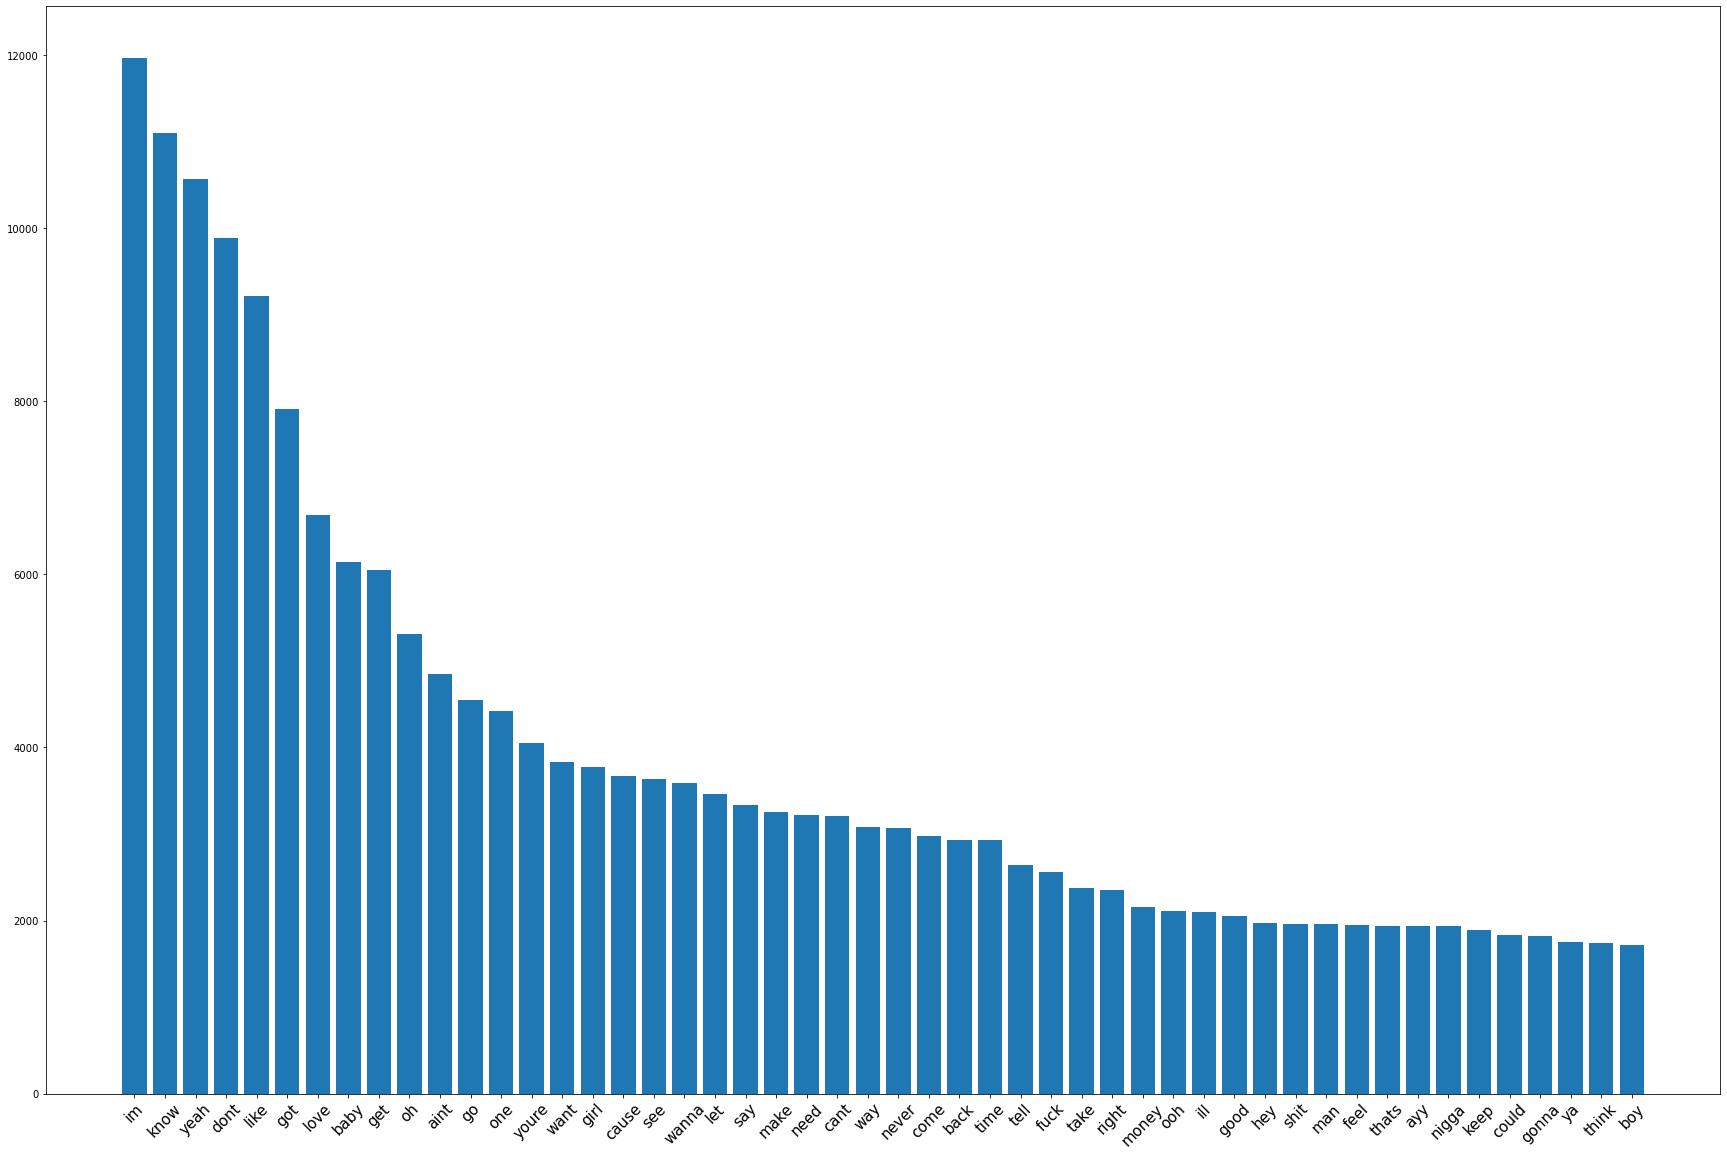

In [198]:
plt.figure(figsize=(30,20))
plt.bar(cluster_0.drop(drops).index[0:50], cluster_0.drop(drops)[0:50])
plt.xticks(rotation=45, fontsize=15)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

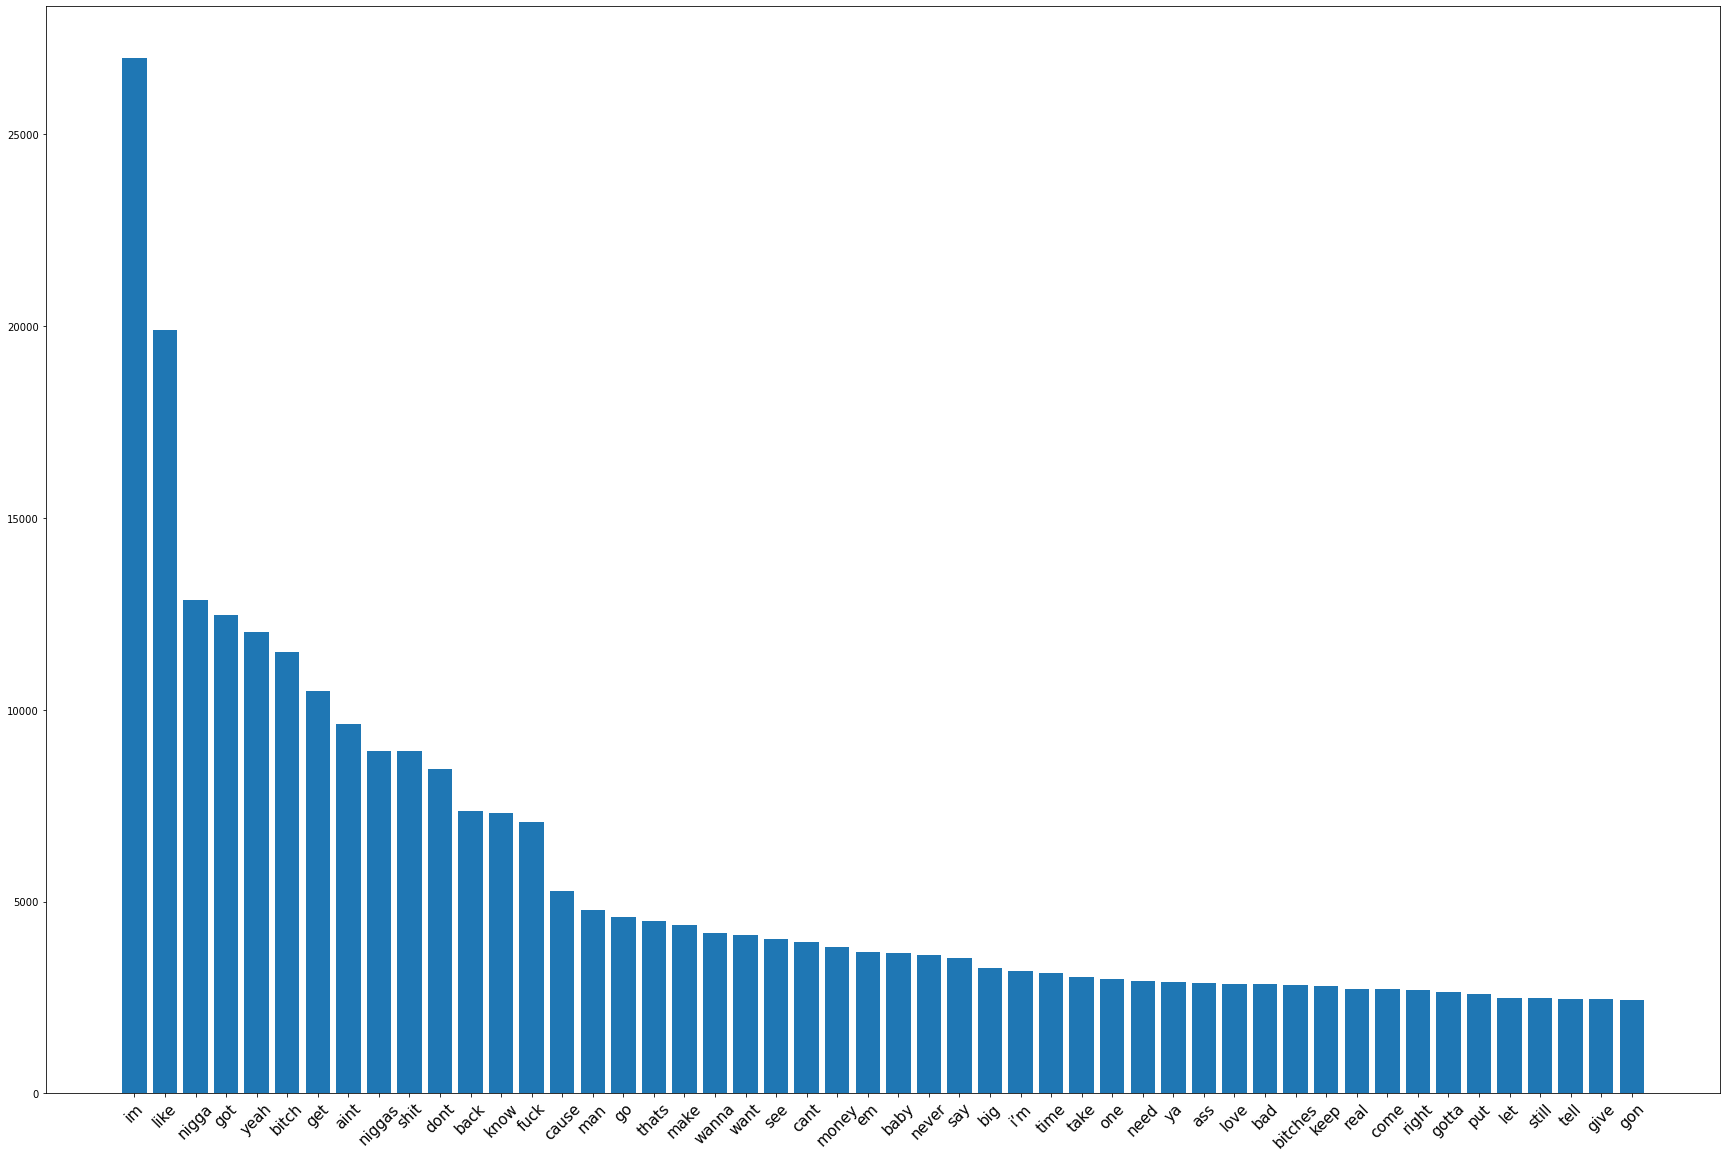

In [201]:
plt.figure(figsize=(30,20))
plt.bar(cluster_1.drop(drops).index[0:50], cluster_1.drop(drops)[0:50])
plt.xticks(rotation=45, fontsize=15)